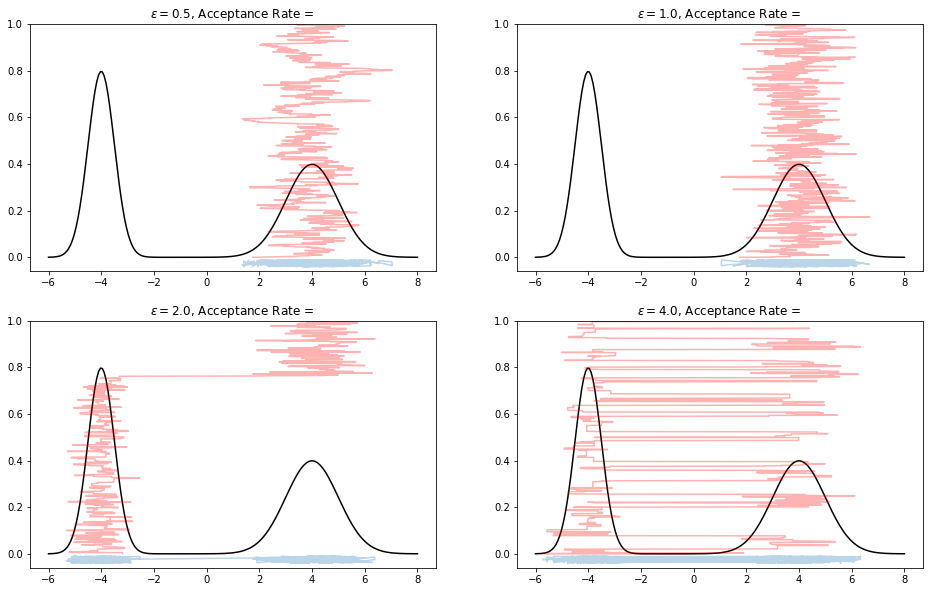

In [6]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np

def proposal_pdf(x):
    return (sts.norm(-4, 0.5).pdf(x) + sts.norm(4, 1).pdf(x))

# Global parameter
iterations = 1000

#our function
def mcmc_function(target_pdf, e):
    samples = np.zeros(iterations)          # storage vector
    sample_curr = sts.norm(0, 3).rvs()   # initial stage
    isAccepted = np.zeros(iterations)
    
    for i in range(iterations):  #here we will perform comparisons and check whether we wish to move or stay at the value
        draw = sts.norm.rvs(sample_curr, e)
        acceptance_rate = target_pdf(draw) / target_pdf(sample_curr)
        if acceptance_rate >= 1 or np.random.random_sample() < acceptance_rate:
            sample_curr = draw
            isAccepted[i] = 1
        samples[i] = sample_curr
    return(samples, isAccepted)      
plt.figure(figsize=(16,10))

#different values for epsilon to vary acceptance rate
for i, e in enumerate([0.5, 1, 2, 4]):
    samples, isAccepted = mcmc_function(proposal_pdf, e)
    x = np.linspace(-6, 8, 200)
    plt.subplot(2, 2, i+1)
    plt.plot(x, proposal_pdf(x), color="black")
    plt.plot(samples, sts.uniform.rvs(loc=-0.04, scale=0.03, size=iterations), 
             markersize = 0.8, alpha=0.3)
    plt.plot(samples, np.linspace(0, 1, iterations), alpha=0.3, color="red")
    plt.title(r'$\epsilon = {:.1f}$, Acceptance Rate = '.format(e, np.mean(isAccepted)))
    plt.ylim([-0.06, 1])

plt.show()
